# Uczenie Maszynowe - ćwiczenia 5 (plik roboczy)

Dziś poznamy nowe algorytmy uczenia maszynowego, dowiemy się czegoś o hiperparametrach modeli i zastosujemy je w praktyce!

# Support Vector Regression (SVR)

Support Vector Regression (SVR) to algorytm oparty na zasadach Support Vector Machines (SVM), stosowany do regresji. Celem SVR jest znalezienie linii, krzywej lub powierzchni, która najlepiej odwzorowuje zależność między zmiennymi wejściowymi a wyjściową. Oto kluczowe aspekty działania SVR:

Wektory nośne (support vector) oznacza wykorzystanie punktów "najistotniejszych" do wpsowania modelu.

### Zasada Epsilon-Tube

SVR nie próbuje dokładnie dopasować modelu do każdego punktu danych. Zamiast tego, określa pewien margines błędu, zwany epsilon (ε), w którym model toleruje różnice między przewidywanymi a rzeczywistymi wartościami.

Jeśli punkt danych znajduje się w tym marginesie, jest traktowany jako "dobrze dopasowany" i nie wpływa na ostateczne rozwiązanie.
Punkty poza marginesem (leżące poza epsilon-tube) przyczyniają się do błędu i są karane w funkcji kosztu.

### Optymalizacja i marginesy

Celem SVR jest znalezienie takiej linii/krzywej/powierzchni, która:

Minimalizuje odchylenie od danych, jednocześnie dopuszczając tolerancję ε.
Maksymalizuje płaskość funkcji, co oznacza regularyzację.

Formuła optymalizacji w SVR uwzględnia dwa aspekty:

Minimalizację ∣∣w∣∣2 (ograniczanie modelu, aby był prosty).
Minimalizację błędów dla punktów poza epsilon-tube (punkty trudne do przewidzenia są karane proporcjonalnie do ich odległości od marginesu).

### Kara za odchylenia - parametr C

Parametr C kontroluje kompromis między dopasowaniem modelu a jego ogólną złożonością:

    Niskie C: Model jest bardziej elastyczny, dopuszcza większe błędy, co może skutkować niedopasowaniem (underfitting).
    Wysokie C: Model bardziej stara się dopasować do danych treningowych, co może prowadzić do przeuczenia (overfitting).

### Kernel i przestrzeń cech

SVR może pracować z danymi nieliniowymi dzięki tzw. trikom jądrowym (kernel tricks):

Kernel przekształca dane do wyższej przestrzeni wymiarów, gdzie można łatwiej znaleźć liniową hiperpowierzchnię (np. linię regresji).

Popularne kernele to:
        
        Linear (prosta regresja liniowa),
        Polynomial (model polinomiczny),
        RBF (nieliniowy model z funkcją radialną, dobry dla złożonych danych).

### Epsilon i funkcja kosztu

Parametr ε (epsilon) definiuje szerokość marginesu tolerancji:

    Mniejsze epsilon: Model stara się bardziej dopasować do danych, co może skutkować przeuczeniem.
    Większe epsilon: Model jest bardziej tolerancyjny na błędy i ignoruje drobne odchylenia.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from ipywidgets import interact

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = X.ravel() + 4 * (0.5 - np.random.rand(50))

# Function to plot SVR with interactive controls
def plot_svr(C=1.0, epsilon=0.1, kernel='rbf'):
    # Train SVR model
    svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
    svr.fit(X, y)
    
    # Generate predictions
    X_fit = np.linspace(0, 5, 500).reshape(-1, 1)
    y_fit = svr.predict(X_fit)
    
    # Plot data and SVR predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='red', label='Data points')
    plt.plot(X_fit, y_fit, color='blue', label='SVR prediction')
    plt.fill_between(
        X_fit.ravel(),
        y_fit - epsilon,
        y_fit + epsilon,
        color='blue',
        alpha=0.2,
        label=f"Epsilon-tube (ε={epsilon})"
    )
    plt.title(f"Support Vector Regression (Kernel: {kernel}, C={C}, ε={epsilon})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Create interactive widget
interact(
    plot_svr,
    C=(0.1, 100.0, 0.1),
    epsilon=(0.01, 1.0, 0.01),
    kernel=['linear', 'poly', 'rbf']
)


interactive(children=(FloatSlider(value=1.0, description='C', min=0.1), FloatSlider(value=0.1, description='ep…

<function __main__.plot_svr(C=1.0, epsilon=0.1, kernel='rbf')>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from ipywidgets import interact

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = np.sin(X).ravel() + 0.3 * (0.5 - np.random.rand(50))

# Function to plot SVR with interactive controls
def plot_svr(C=1.0, epsilon=0.1, kernel='rbf'):
    # Train SVR model
    svr = SVR(kernel=kernel, C=C, epsilon=epsilon)
    svr.fit(X, y)
    
    # Generate predictions
    X_fit = np.linspace(0, 5, 500).reshape(-1, 1)
    y_fit = svr.predict(X_fit)
    
    # Plot data and SVR predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='red', label='Data points')
    plt.plot(X_fit, y_fit, color='blue', label='SVR prediction')
    plt.fill_between(
        X_fit.ravel(),
        y_fit - epsilon,
        y_fit + epsilon,
        color='blue',
        alpha=0.2,
        label=f"Epsilon-tube (ε={epsilon})"
    )
    plt.title(f"Support Vector Regression (Kernel: {kernel}, C={C}, ε={epsilon})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()

# Create interactive widget
interact(
    plot_svr,
    C=(0.1, 100.0, 0.1),
    epsilon=(0.01, 1.0, 0.01),
    kernel=['linear', 'poly', 'rbf']
)


interactive(children=(FloatSlider(value=1.0, description='C', min=0.1), FloatSlider(value=0.1, description='ep…

<function __main__.plot_svr(C=1.0, epsilon=0.1, kernel='rbf')>

# Zadanie 1.

Poniżej znajdziesz wygenerowane dwa zestawy danych. Wykorzystaj algorytm SVR by jak najlepiej rozwiązać problem predykcji. Wyświetl wpasowany model w dane by lepiej zwizualizować zależność parametrów od zachowania algorytmu.


In [6]:
import matplotlib.pyplot as plt

In [42]:
from sklearn.datasets import make_regression
dataset1 = make_regression(n_samples=1000,n_features=1,noise=3)
dataset1_x = dataset1[0]
dataset1_y = dataset1[1]
dataset2 = make_regression(n_samples=1000,n_features=1,noise=3)
dataset2_x = dataset2[0]
dataset2_y = dataset2[1]**2

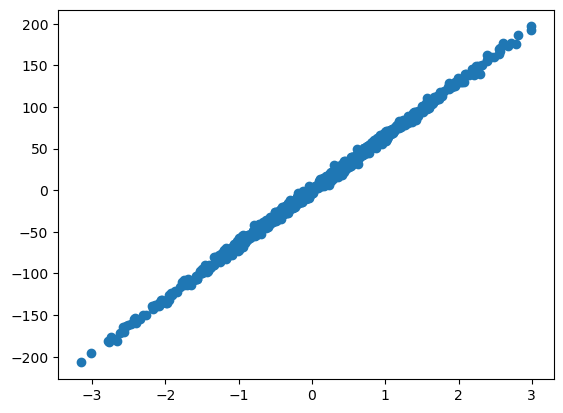

In [44]:
plt.scatter(dataset1_x,dataset1_y)

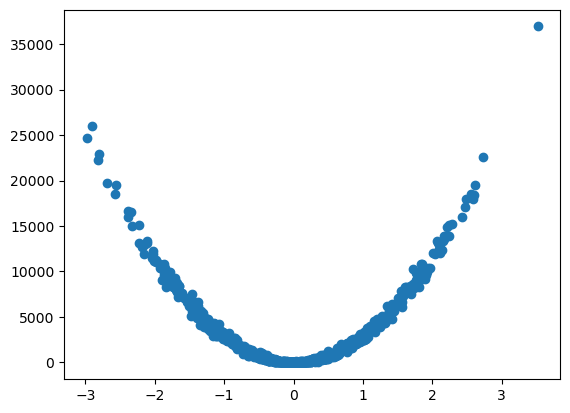

In [46]:
plt.scatter(dataset2_x,dataset2_y)

In [80]:
np.linspace(0.01,10,10)

array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ])

In [86]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

model = SVR()
param_grid = {'kernel': ['rbf','linear','poly','sigmoid'],
            'C': np.linspace(0.01,10,10),
            'epsilon': np.linspace(0.01,1,10),
             'gamma': ['scale','auto']}
X_train, X_test, y_train, y_test = train_test_split(dataset1_x, dataset1_y, test_size = .2)
gscv = GridSearchCV(model, param_grid, scoring = 'r2', cv = 5, verbose = 3, refit=True)
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.033 total time=   0.0s
[CV 2/5] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.033 total time=   0.0s
[CV 3/5] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.032 total time=   0.0s
[CV 4/5] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.022 total time=   0.0s
[CV 5/5] END ..C=0.01, epsilon=0.01, kernel=rbf;, score=0.023 total time=   0.0s
[CV 1/5] END C=0.01, epsilon=0.01, kernel=linear;, score=0.150 total time=   0.0s
[CV 2/5] END C=0.01, epsilon=0.01, kernel=linear;, score=0.150 total time=   0.0s
[CV 3/5] END C=0.01, epsilon=0.01, kernel=linear;, score=0.150 total time=   0.0s
[CV 4/5] END C=0.01, epsilon=0.01, kernel=linear;, score=0.143 total time=   0.0s
[CV 5/5] END C=0.01, epsilon=0.01, kernel=linear;, score=0.139 total time=   0.0s
[CV 1/5] END .C=0.01, epsilon=0.01, kernel=poly;, score=0.571 total time=   0.0s
[CV 2/5] END .C=0.01, epsilon=0.01, kern

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ]),
                         'epsilon': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='r2', verbose=3)

In [98]:
gscv.best_estimator_

SVR(C=8.89, epsilon=0.89, kernel='linear')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......C=2.23, epsilon=0.45, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ......C=2.23, epsilon=0.45, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ......C=2.23, epsilon=0.45, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ......C=2.23, epsilon=0.45, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ......C=2.23, epsilon=0.45, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ...C=6.67, epsilon=0.45, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...C=6.67, epsilon=0.45, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...C=6.67, epsilon=0.45, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...C=6.67, epsilon=0.45, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...C=6.67, epsilon=0.45, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...C=1.12, epsilon=0.01, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ...C=1.12, epsilon=0.01, gamma=auto, 

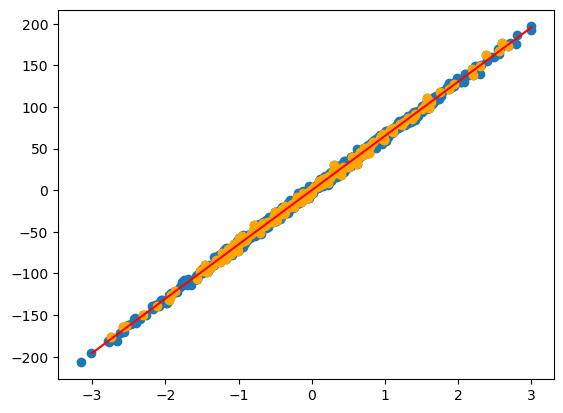

In [112]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
import numpy as np

model = SVR()
param_grid = {'kernel': ['rbf','linear','poly','sigmoid'],
            'C': np.linspace(0.01,10,10),
            'epsilon': np.linspace(0.01,1,10),
             'gamma': ['scale','auto']}
X_train, X_test, y_train, y_test = train_test_split(dataset1_x, dataset1_y, test_size = .2)
gscv = RandomizedSearchCV(model, param_grid, scoring = 'r2', cv = 5, verbose = 2, refit=True,n_iter=100)
gscv.fit(X_train,y_train)

y_test_pred = gscv.predict(X_test)
print("R2 TEST:",r2_score(y_test,y_test_pred))

plt.scatter(dataset1_x,dataset1_y)
plt.scatter(X_test,y_test,c='orange')
Xs = np.linspace(-3,3,400).reshape(-1,1)
Ys = gscv.predict(Xs)
plt.plot(Xs,Ys,c='r')

R2 TEST: 0.997614645273504


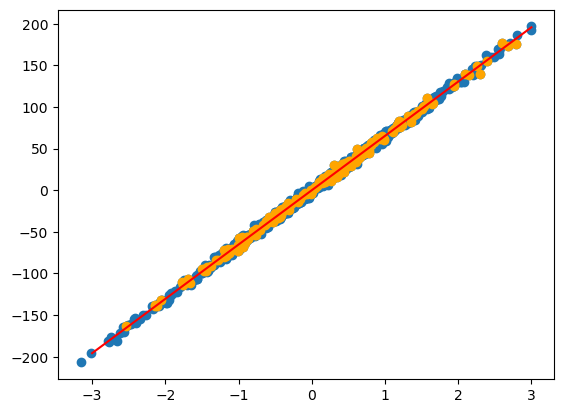

In [106]:
y_test_pred = gscv.predict(X_test)
print("R2 TEST:",r2_score(y_test,y_test_pred))

plt.scatter(dataset1_x,dataset1_y)
plt.scatter(X_test,y_test,c='orange')
Xs = np.linspace(-3,3,400).reshape(-1,1)
Ys = gscv.predict(Xs)
plt.plot(Xs,Ys,c='r')


# Zadanie 2.

Wykorzystując dane z poprzednich ćwiczeń (i podział na zbiory oraz sprawdzian kryżowy), wykorzystaj algorytm SVR do predykcji. Wesprzyj się dokumentacją: https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html

2a. Sprawdź wynik SVR (dla domyślnych parametrów, ale różnych typów kernela) dla różnych kombinacji cech. Potwierdź czy model działa najlepiej dla wcześniej wybranego zestawu cech czy też może zauważalna jest różnica.
2b. Dla wybranego zestawu cech, sprawdź różne kombinacje hiperparametrów modelu, w tym kernel, C, epsilon oraz gamma. 

# **Regresja k-NN (k-Nearest Neighbors Regression)**

Regresja k-NN (ang. *k-Nearest Neighbors Regression*) to prosty, ale potężny algorytm uczenia maszynowego, który wykorzystuje odległości między punktami danych do przewidywania wartości ciągłych. Jest to metoda nieparametryczna, co oznacza, że nie zakłada konkretnej formy zależności między cechami a wartościami wyjściowymi.

---

## **Jak działa algorytm k-NN w regresji?**

1. **Zbieranie danych treningowych**:
   - Algorytm zapamiętuje wszystkie dane treningowe i nie buduje żadnego modelu wstępnego.

2. **Dla nowej próbki (punktu testowego)**:
   - **Krok 1**: Oblicz odległości między nową próbką a wszystkimi punktami w zbiorze treningowym.
     - Najczęściej używane metryki odległości to:
       - **Odległość euklidesowa**:
         $$
         d(x, x') = \sqrt{\sum_{i=1}^n (x_i - x'_i)^2}
         $$
       - **Odległość Manhattan**:
         $$
         d(x, x') = \sum_{i=1}^n |x_i - x'_i|
         $$
   - **Krok 2**: Wybierz \( k \) najbliższych sąsiadów (najmniejszych odległości) do punktu testowego.

3. **Obliczanie wartości przewidywanej**:
   - Wartość przewidywana dla punktu testowego to **średnia wartość wyjściowa \( y \)** najbliższych sąsiadów:
     $$
     \hat{y} = \frac{1}{k} \sum_{i=1}^k y_i
     $$
   - Możliwe jest również stosowanie wag, gdzie bliżsi sąsiedzi mają większy wpływ na wynik:
     $$
     \hat{y} = \frac{\sum_{i=1}^k w_i \cdot y_i}{\sum_{i=1}^k w_i}
     $$
     gdzie $ w_i $ to odwrotność odległości do sąsiada $ w_i = \frac{1}{d(x, x'_i) + \epsilon} $, $ \epsilon $ to mała wartość zapobiegająca dzieleniu przez zero.

4. **Powtórzenie dla wszystkich punktów testowych**:
   - Algorytm wykonuje powyższe kroki dla każdej próbki w zbiorze testowym.

---

## **Hiperparametry k-NN**

1. **Liczba sąsiadów $k$**:
   - Małe $ k $:
     - Model bardziej wrażliwy na szum w danych (przejawia tendencję do overfittingu).
   - Duże $ k $:
     - Model uśrednia wartości w szerszym zakresie, co może prowadzić do underfittingu.

2. **Metryka odległości**:
   - Najczęściej używana jest odległość euklidesowa, ale można stosować inne miary, takie jak Manhattan, Minkowski czy metryki specjalistyczne.

3. **Wagi sąsiadów**:
   - Domyślnie wszyscy sąsiedzi mają równą wagę.
   - Można stosować wagi zależne od odległości, aby bliżsi sąsiedzi mieli większy wpływ.

---

## **Zalety algorytmu k-NN w regresji**

1. **Prostota**:
   - Algorytm jest łatwy do zrozumienia i implementacji.

2. **Elastyczność**:
   - Działa dobrze z danymi o skomplikowanych i nieliniowych zależnościach.

3. **Brak założeń**:
   - Nie wymaga wstępnych założeń o rozkładzie danych.

---

## **Wady algorytmu k-NN w regresji**

1. **Koszt obliczeniowy**:
   - Algorytm wymaga obliczania odległości dla wszystkich punktów w zbiorze treningowym dla każdej próbki testowej, co może być kosztowne dla dużych zbiorów danych.

2. **Wrażliwość na dane**:
   - Wrażliwość na szum i wartości odstające, szczególnie dla małych wartości $ k $.

3. **Problemy ze skalą danych**:
   - Algorytm jest wrażliwy na różnice w skali cech, dlatego standaryzacja lub normalizacja danych jest zwykle konieczna.

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from ipywidgets import interact

# Generate synthetic dataset
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)
X_train, X_test = X[:160], X[160:]
y_train, y_test = y[:160], y[160:]

# Interactive function for k-NN
def interactive_knn(n_neighbors=3, weights='uniform'):
    # Train k-NN regressor
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = knn.predict(X_test)
    
    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Plot training data, test data, and predictions
    plt.figure(figsize=(12, 6))
    
    # Scatter plot of training and test data
    plt.scatter(X_train, y_train, label="Training Data", color='blue', alpha=0.7)
    plt.scatter(X_test, y_test, label="Test Data", color='orange', alpha=0.7)
    
    # Line plot of predictions
    X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred_range = knn.predict(X_range)
    plt.plot(X_range, y_pred_range, color='red', label="k-NN Predictions", linewidth=2)
    
    # Titles and labels
    plt.title(f"k-NN Regression (k={n_neighbors}, weights='{weights}')\nMSE: {mse:.2f}")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets for k and weights
interact(
    interactive_knn,
    n_neighbors=widgets.IntSlider(min=1, max=20, step=1, value=3, description='k (Neighbors)'),
    weights=widgets.RadioButtons(
        options=['uniform', 'distance'],
        value='uniform',
        description='Weights:'
    )
)


interactive(children=(IntSlider(value=3, description='k (Neighbors)', max=20, min=1), RadioButtons(description…

<function __main__.interactive_knn(n_neighbors=3, weights='uniform')>

## Zadanie 3.

Wykorzystując dane z poprzednich ćwiczeń (i podział na zbiory oraz sprawdzian kryżowy), wykorzystaj algorytm k-NN do predykcji. Wesprzyj się dokumentacją: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

    3a. Sprawdź wynik k-NN dla wybranego przez Ciebie zestawu parametrów.
    3b. Dla wybranego zestawu cech, sprawdź różne kombinacje hiperparametrów i wykonaj krzywe złożoności dla parametry n_neighbors oraz p.

# Drzewa decyzyjne

Drzewa decyzyjne to popularny algorytm uczenia maszynowego, który można wykorzystać zarówno do zadań klasyfikacji, jak i regresji. W przypadku regresji drzewa decyzyjne służą do przewidywania wartości ciągłych, co czyni je potężnym narzędziem w modelowaniu danych z nieliniowymi i złożonymi zależnościami.


## Drzewo decyzyjne

Drzewo decyzyjne to struktura przypominająca diagram, w której dane są dzielone na podstawie warunków logicznych, tworząc węzły i gałęzie.

    Korzeń drzewa: Punkt początkowy, zawierający całe dane wejściowe.
    
    Węzły decyzyjne: Punkty, w których dane są dzielone na podstawie określonego warunku (np. cechy, która najlepiej wyjaśnia dane w danym momencie).
    
    Liście: Końcowe węzły, które reprezentują przewidywaną wartość w przypadku regresji.
    
## Regresja z wykorzystaniem drzew decyzyjnych

### Podział danych - proces uczenia

Drzewo iteracyjnie dzieli dane wejściowe na podzbiory na podstawie wybranej cechy i warunku, który minimalizuje błąd predykcji.

    Na przykład powierzchnia mieszkania > 50m2 -> tak lub nie, dzieli dane na dwa podzbiory w których predykcja ma konkretną wartość.

Używa się miar takich jak średni błąd kwadratowy (MSE) lub średni absolutny błąd (MAE), aby określić najlepszy podział.

    Kryterium podziału to róznica między rzeczywistą wartością a średnią wartością w podgrupie, która powstała.

Algorytm kontynuuje podziały, aż osiągnie określone kryterium stopu, np. minimalną liczbę próbek w liściu, maksymalną głębokość drzewa lub brak dalszej poprawy błędu.

### Predykcja
Wartość przewidywana w liściu drzewa decyzyjnego to średnia wartość wyników w danym podzbiorze danych.

### Zalety
    Drzewa są bardzo proste w użyciu i intuicyjne
    Są zdolne do obsługi wysoce nieliniowych związków
    Nie ma potrzeby skalowania danych
    
### Wady

    Drzewa są podatne na overfitting
    Ich przewidywania są średnimi, a zatem są skokowe
    
### Kiedy stosować

    Gdy dane są wysoce nielinowe
    Gdy interpretowalność modelu jest kluczowa
    W danych występują złożone interakcje między cechami, a które trudno ująć np. regresją wielomianową

In [111]:
# Import additional library for tree visualization
from sklearn.tree import plot_tree

# Adjust interactive function to include tree visualization
def interactive_tree_with_plot(max_depth=3, min_samples_split=2, min_samples_leaf=1):
    # Train the Decision Tree Regressor with selected hyperparameters
    regressor = DecisionTreeRegressor(
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train, y_train)
    
    # Predict on the training and test set
    y_pred_train = regressor.predict(X_train)
    y_pred_test = regressor.predict(X_test)
    
    # Calculate Mean Squared Error
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    
    # Create subplots for predictions and tree structure
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot the data and the regression tree predictions
    X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred_range = regressor.predict(X_range)
    
    axs[0].scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)
    axs[0].scatter(X_test, y_test, color='orange', label='Test Data', alpha=0.6)
    axs[0].plot(X_range, y_pred_range, color='red', label='Tree Prediction', linewidth=2)
    axs[0].set_title(f"Decision Tree Regressor\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    axs[0].set_xlabel("Feature")
    axs[0].set_ylabel("Target")
    axs[0].legend()
    axs[0].grid(True)
    
    # Visualize the decision tree structure
    plot_tree(regressor, filled=True, feature_names=["Feature"], ax=axs[1])
    axs[1].set_title("Decision Tree Structure")
    
    plt.tight_layout()
    plt.show()

# Interactive widgets for hyperparameters
interact(
    interactive_tree_with_plot,
    max_depth=widgets.IntSlider(min=1, max=10, step=1, value=3, description='Max Depth'),
    min_samples_split=widgets.IntSlider(min=2, max=20, step=1, value=2, description='Min Samples Split'),
    min_samples_leaf=widgets.IntSlider(min=1, max=10, step=1, value=1, description='Min Samples Leaf')
)


interactive(children=(IntSlider(value=3, description='Max Depth', max=10, min=1), IntSlider(value=2, descripti…

<function __main__.interactive_tree_with_plot(max_depth=3, min_samples_split=2, min_samples_leaf=1)>

In [114]:
# Generate a more non-linear dataset
np.random.seed(42)
X_nl = np.sort(np.random.rand(200, 1) * 10, axis=0)  # Random values between 0 and 10
y_nl = np.sin(X_nl).ravel() + np.random.normal(0, 0.2, X_nl.shape[0])  # Sinusoidal with noise

# Split into training and testing sets
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_nl, y_nl, test_size=0.2, random_state=42)

# Interactive function for non-linear example
def interactive_tree_with_plot_nonlinear(max_depth=3, min_samples_split=2, min_samples_leaf=1):
    # Train the Decision Tree Regressor with selected hyperparameters
    regressor = DecisionTreeRegressor(
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    regressor.fit(X_train_nl, y_train_nl)
    
    # Predict on the training and test set
    y_pred_train_nl = regressor.predict(X_train_nl)
    y_pred_test_nl = regressor.predict(X_test_nl)
    
    # Calculate Mean Squared Error
    train_mse = mean_squared_error(y_train_nl, y_pred_train_nl)
    test_mse = mean_squared_error(y_test_nl, y_pred_test_nl)
    
    # Create subplots for predictions and tree structure
    fig, axs = plt.subplots(2, 1, figsize=(18, 16))
    
    # Plot the data and the regression tree predictions
    X_range = np.linspace(X_nl.min(), X_nl.max(), 500).reshape(-1, 1)
    y_pred_range = regressor.predict(X_range)
    
    axs[0].scatter(X_train_nl, y_train_nl, color='blue', label='Training Data', alpha=0.6)
    axs[0].scatter(X_test_nl, y_test_nl, color='orange', label='Test Data', alpha=0.6)
    axs[0].plot(X_range, y_pred_range, color='red', label='Tree Prediction', linewidth=2)
    axs[0].set_title(f"Decision Tree Regressor (Non-Linear Example)\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    axs[0].set_xlabel("Feature")
    axs[0].set_ylabel("Target")
    axs[0].legend()
    axs[0].grid(True)
    
    # Visualize the decision tree structure
    plot_tree(regressor, filled=True, feature_names=["Feature"], ax=axs[1])
    axs[1].set_title("Decision Tree Structure")
    
    plt.tight_layout()
    plt.show()

# Interactive widgets for hyperparameters
interact(
    interactive_tree_with_plot_nonlinear,
    max_depth=widgets.IntSlider(min=1, max=10, step=1, value=3, description='Max Depth'),
    min_samples_split=widgets.IntSlider(min=2, max=20, step=1, value=2, description='Min Samples Split'),
    min_samples_leaf=widgets.IntSlider(min=1, max=10, step=1, value=1, description='Min Samples Leaf')
)


interactive(children=(IntSlider(value=3, description='Max Depth', max=10, min=1), IntSlider(value=2, descripti…

<function __main__.interactive_tree_with_plot_nonlinear(max_depth=3, min_samples_split=2, min_samples_leaf=1)>

## Zadanie 4.

Wykorzystując dane z poprzednich ćwiczeń (i podział na zbiory oraz sprawdzian kryżowy), wykorzystaj algorytm k-NN do predykcji. Wesprzyj się dokumentacją: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

    4a. Wytrenuj model dla danych dobierając parametry na podstawie krzywych złożoności.
    4b. Dla wybranego modelu zwizualizuj drzewo i dokonaj jego interpretacji.
    4c. Przeanalizuj predykcje, w których przewidywana wartość znacząco odstaje od predykcji drzewa. Spróbuj zinterpretować przyczynę tego zdarzenia.